# Linear Regression Assignment - Boom Bikes



In [1161]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import warnings                    
warnings.filterwarnings('ignore')    # This will ignore the warnings

In [1162]:
df = pd.read_csv('day.csv') # Reading the DataFrame

pd.set_option('display.max_columns', 500)

In [1163]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1164]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1166]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The Data Contains no **Null** values and is Good for further processing

# EDA

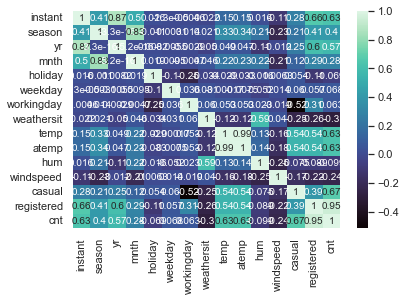

In [1167]:
corr = df.corr()
sns.heatmap(corr, cmap="mako", annot=True)
sns.set(rc={'figure.figsize':(16,16)})


 1. Really high correlation can be observed between cnt and temp
 2. Really high correlation can be observed between cnt and yr
 3. High negative correlation is observed between cnt and windspeed
 4. High negative correlation is observed between cnt and weathersit
 

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

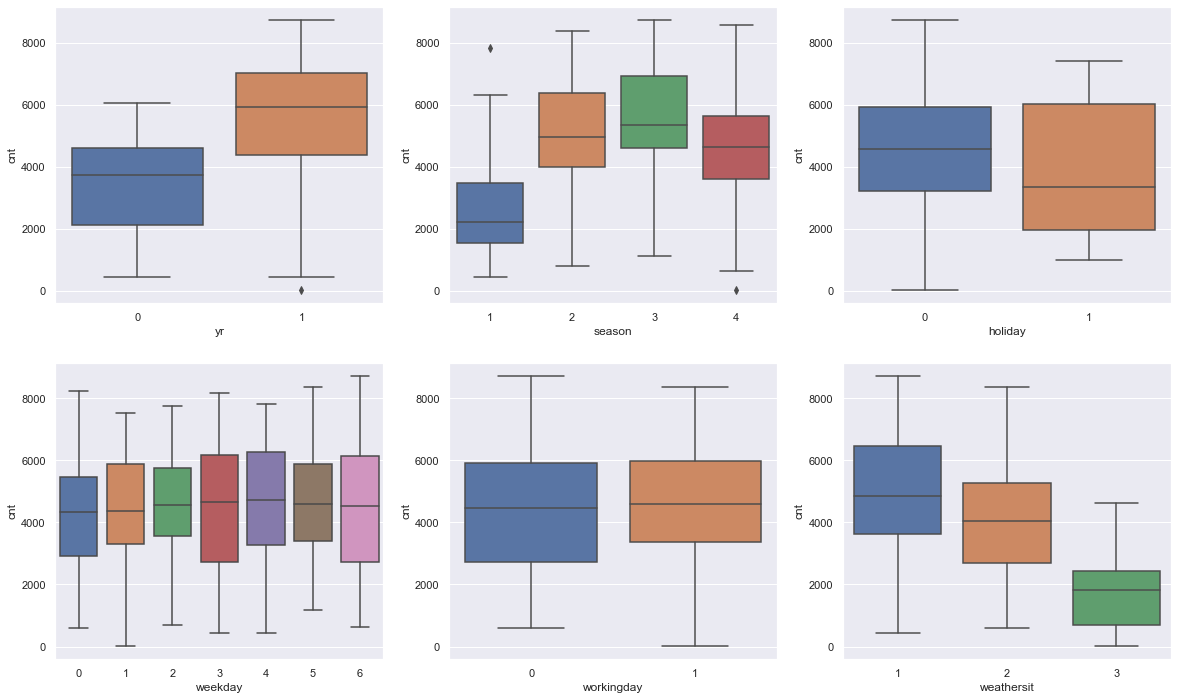

In [1168]:
plt.figure(figsize =(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(2, 3, 2)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2, 3, 3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(2, 3, 4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2, 3, 5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2, 3, 6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)



 1. cnt was considerably higher in the second year of business.
 2. cnt is the lowest in spring, and comparetively lower in winter as compares to summer.
 3. cnt is highest in fall.
 4. cnt is low on holidays.
 5. cnt is cnt gets frequently lowered on wednesdays and saturdays.
 6. cnt is low on misty and cloudy days and severly declines during heavy rains.

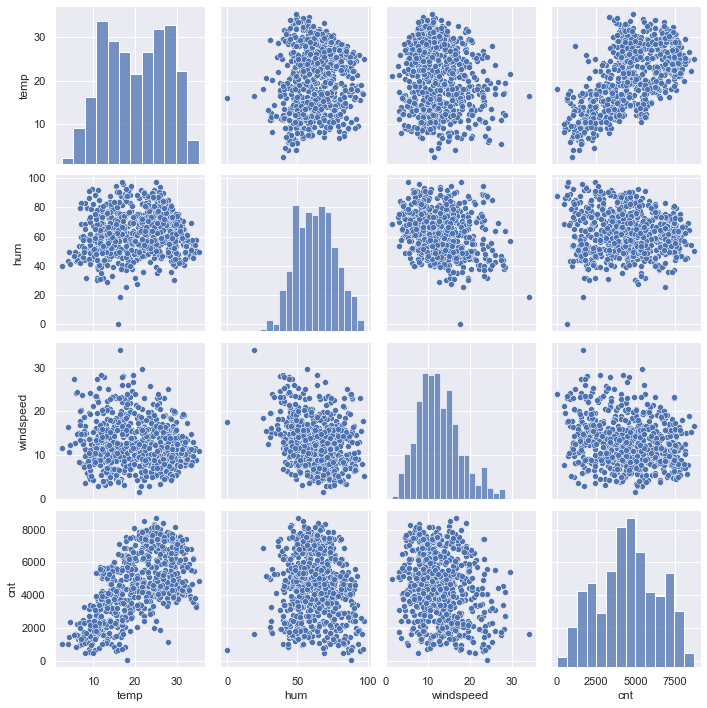

In [1169]:
numeric_vars=df[[ 'temp', 'hum', 'windspeed','cnt']]
sns.pairplot(numeric_vars)
plt.show()

There seems to be some linear relationship between cnt and temp

In [1170]:
mnth_yr_cnt = pd.pivot_table(df, values='cnt', index=['mnth'],    
                    columns=['yr'], aggfunc=np.sum)         # Creating pivot table
cm = sns.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

mnth_yr_cnt.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table


yr,0,1
mnth,,
1,38189,96744
2,48215,101303
3,64045,164875
4,94870,174224
5,135821,195865
6,143512,202830
7,141341,203607
8,136691,214503
9,127418,218573


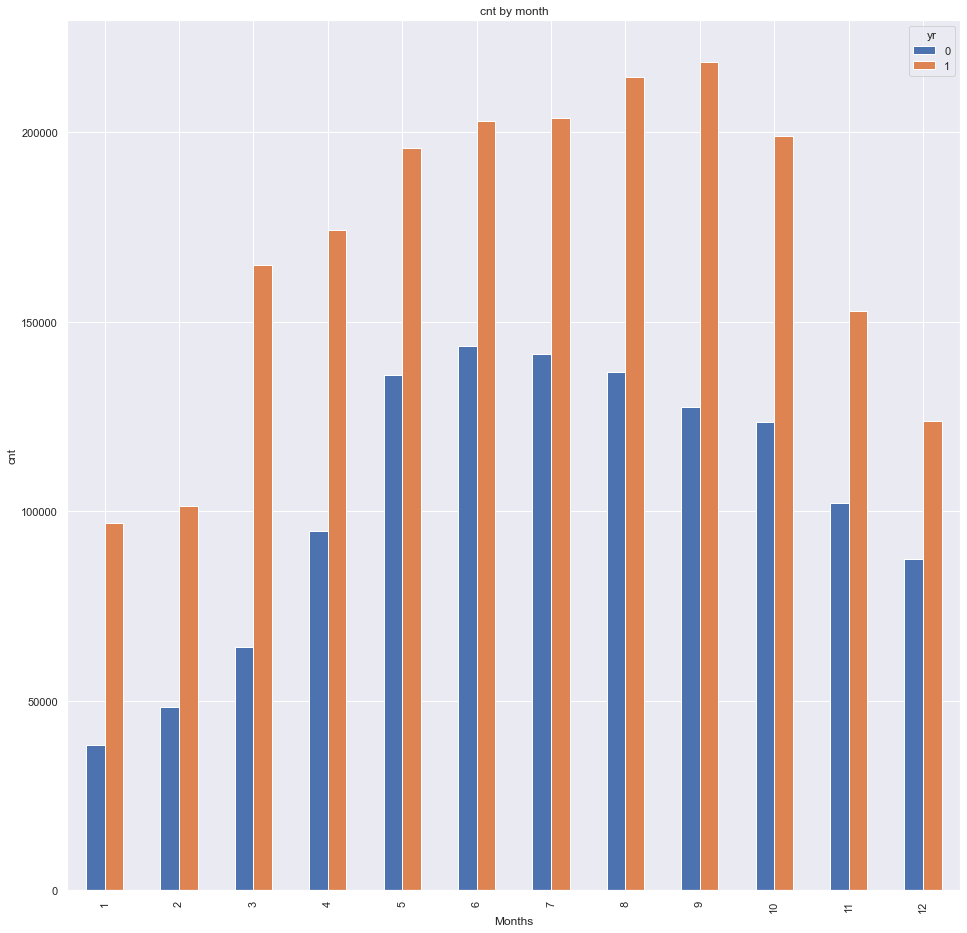

In [1171]:
mnth_yr_cnt.plot(kind='bar', stacked=False, title='cnt by month')
plt.xlabel('Months')          # This will lable the x axis
plt.ylabel('cnt')          # This will lable the x axis
plt.title('cnt by month')    # This will lable the plot

plt.show()

The count of bike use is high from March to october

In [1172]:
season_yr_cnt = pd.pivot_table(df, values='cnt', index=['season'],    
                    columns=['yr'], aggfunc=np.sum)         # Creating pivot table
cm = sns.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

season_yr_cnt.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table


yr,0,1
season,,
1,150000,319514
2,347316,571273
3,419650,641479
4,326137,515476


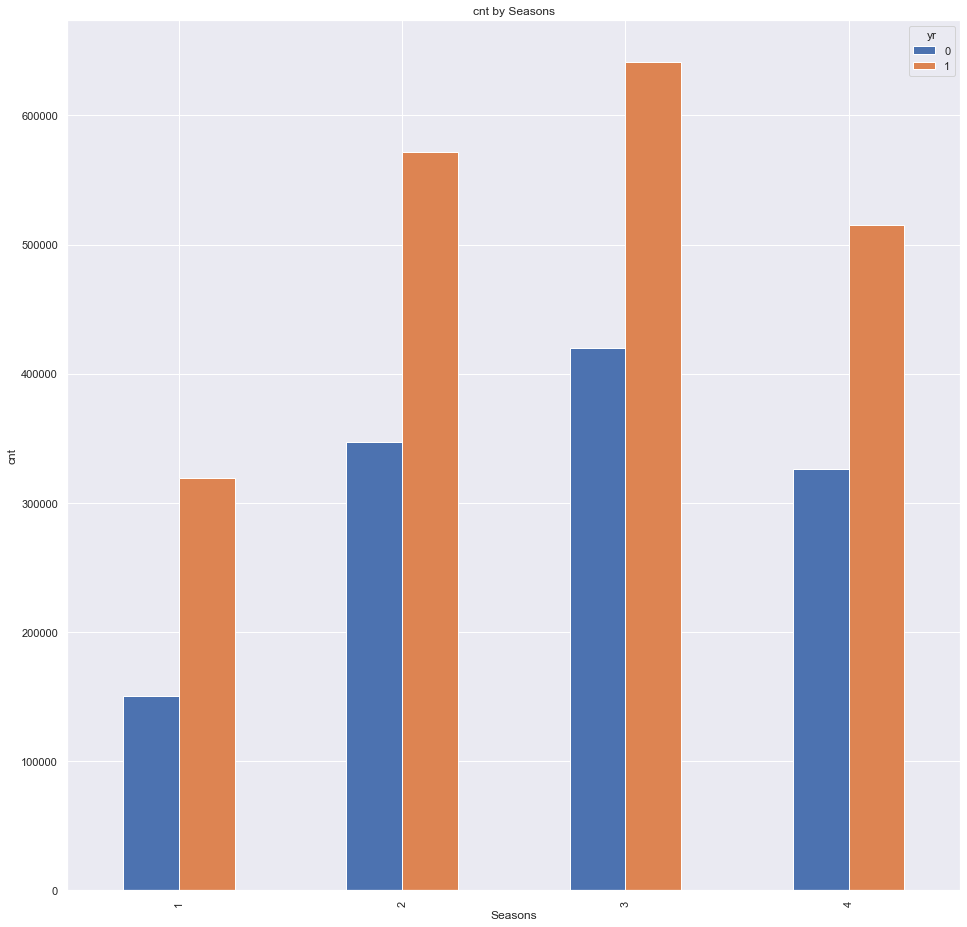

In [1173]:
season_yr_cnt.plot(kind='bar', stacked=False, title='cnt by month')
plt.xlabel('Seasons')          # This will lable the x axis
plt.ylabel('cnt')          # This will lable the x axis
plt.title('cnt by Seasons')    # This will lable the plot

plt.show()

The count of the bike use increaes during Fall

In [1174]:
season_week_cnt = pd.pivot_table(df, values='cnt', index=['weekday'],    
                    columns=['season'], aggfunc=np.median)         # Creating pivot table
cm = sns.light_palette("green", as_cmap=True)        # Setting Style variable to map the table

season_week_cnt.apply(pd.to_numeric).style.background_gradient(cmap=cm)  # Setting Style of the table


season,1,2,3,4
weekday,,,,
0,1977.000000,4847.000000,5150.500000,4083.500000
1,1998.500000,4362.000000,6038.500000,4607.500000
2,2133.000000,4931.500000,5204.000000,4509.500000
3,2184.500000,4862.000000,5225.000000,5035.000000
4,2744.000000,4997.000000,5710.000000,4765.000000
5,3129.000000,5114.500000,5538.000000,4985.000000
6,2077.000000,5327.000000,5345.000000,5138.000000


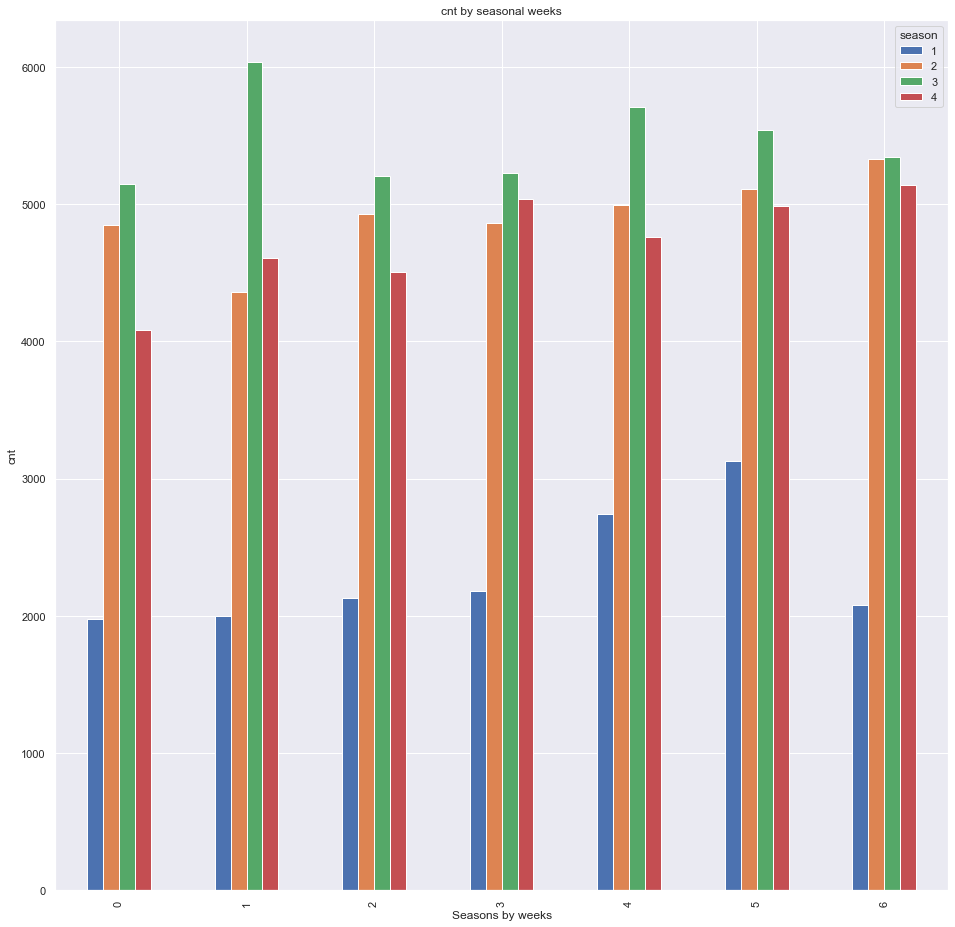

In [1175]:
season_week_cnt.plot(kind='bar', stacked=False, title='cnt by seasonal weeks')
plt.xlabel('Seasons by weeks')          # This will lable the x axis
plt.ylabel('cnt')          # This will lable the x axis
plt.title('cnt by seasonal weeks')    # This will lable the plot

plt.show()

The counts of the bikes are as follows
- Thursdays and Fridays of Spring
- Mondays of Fall
- Overall count is comparetively lower during spring
- Overall count is really high during fall
- weekly count of bikes is fairly gradgual during summer and winters
- Count is really low on winter sundays

### Spliting Variables  , Creating New Variables & Dummy Variables
 1. Seasons 
     1. Spring
     2. Summer
     3. Fall
     4. Winter
     
 2. Weatherlist
     1. Clear, Few clouds, Partly cloudy, Partly cloudy (**Clear**)
	 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (**Mist**)
	 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (**Rain**)
	 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (**Storm**)
     
 3. Months
 
 4. Weekdays

In [1176]:
df['season'] = df['season'].astype(int)
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

df['weathersit'] = df['weathersit'].astype(int)
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'rain', 4: 'storm'})

df['weekday'] = df['weekday'].astype(int)
df['weekday'] = df['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

df['mnth'] = df['mnth'].astype(int)
df['mnth'] = df['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})


df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1177]:
df.mnth.value_counts()  # There are no days with storm

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [1178]:
season_col = pd.get_dummies(df['season'], drop_first = True)

weather_col = pd.get_dummies(df['weathersit'], drop_first = True)

weekday_col = pd.get_dummies(df['weekday'], drop_first = True)

mnth_col = pd.get_dummies(df['mnth'], drop_first = True)


In [1179]:
season_col.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1180]:
weather_col.head()

,mist,rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [1181]:
weekday_col.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [1182]:
mnth_col.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1183]:
df = pd.concat([df, weather_col, season_col, weekday_col, mnth_col ], axis = 1)  # Concatinating new dummy variables with the DataFrame


In [1184]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


### New Variables

 - Creating Anual_Quaters Variable as q1, q2, q3, q4.
 - Creating hum_temp as humidity X temprature
 - Creating hum_wind as humidity X windspeed
 - Creating wind_temp as windspeed X temprature
 - Creating hum_temp_wind as humidity X temprature X windspeed

In [1185]:
df['Anual_Quaters'] = df['mnth'].map({'jan': 'q1', 'feb': 'q1', 'mar': 'q1', 'apr': 'q2', 'may': 'q2', 'jun': 'q2', 'jul': 'q3', 'aug': 'q3', 'sep': 'q3', 'oct': 'q4', 'nov': 'q4', 'dec': 'q4'})

In [1186]:
df['hum_temp'] = df['hum'] * df['temp']

df['hum_wind'] = df['hum'] * df['windspeed']

df['wind_temp'] = df['windspeed'] * df['temp']

df['hum_temp_wind'] = df['hum'] * df['temp'] * df['windspeed']


In [1187]:
anual_q = pd.get_dummies(df['Anual_Quaters'], drop_first = True)

In [1188]:
anual_q.head()

,q2,q3,q4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1189]:
df = pd.concat([df, anual_q ], axis = 1)  # Concatinating new dummy variables with the DataFrame

In [1190]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Anual_Quaters,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,q1,1137.098617,866.260966,151.689940,12223.675956,0,0,0
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,q1,1037.350473,1159.131938,248.159746,17274.077304,0,0,0
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,q1,352.045169,727.478103,133.940831,5856.870920,0,0,0
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,q1,484.156700,634.117271,88.066622,5199.761620,0,0,0
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,q1,406.598844,547.170664,116.522969,5091.552709,0,0,0


## Dropping all unnecessary variables

- Since there are only two values in the year column we are not dropping it now but on addition of new year data we will have to treat it as categorical.
- Also since 2020 and 2021 have been a slump year in business the 'year' data looses value untill more data is collected and used to train the model.

In [1191]:
df.drop(['season', 'weathersit', 'weekday', 'mnth', 'dteday', 'instant', 'weathersit', 'Anual_Quaters', 'casual', 'registered' ], axis = 1, inplace = True)

In [1192]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1137.098617,866.260966,151.689940,12223.675956,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1037.350473,1159.131938,248.159746,17274.077304,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,352.045169,727.478103,133.940831,5856.870920,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,484.156700,634.117271,88.066622,5199.761620,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,406.598844,547.170664,116.522969,5091.552709,0,0,0


In [1193]:
df.shape

(730, 37)

## Spliting into train and test

In [1194]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 37)
(220, 37)


### Rescaling Features 

- Using MinMax scaler.

In [1195]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['hum_temp', 'hum_wind', 'wind_temp', 'hum_temp_wind', 'temp', 'atemp', 'hum', 'windspeed', 'temp', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.843357,0.357842,0.439690,0.382733,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.432002,0.307411,0.230560,0.190901,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.207609,0.520791,0.324426,0.199771,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.309619,0.195479,0.158159,0.110400,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.412400,0.492000,0.259884,0.248358,1,0,0


### Dividing into X and Y 

In [1196]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

- First we will use RFE to get only one variable of importance this will help us rank the features
- Then we will build the model further

In [1197]:
# Running RFE with the output number of the variable equal to 1
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe_1 = RFE(lm, n_features_to_select=1)             # running RFE
rfe_1 = rfe_1.fit(X_train, y_train)

In [1198]:
# Taking a look at the rankings of the features
rfe_rank = sorted(list(zip(rfe_1.ranking_,X_train.columns)))
rfe_rank

[(1, 'windspeed'),
 (2, 'wind_temp'),
 (3, 'hum_temp_wind'),
 (4, 'hum_temp'),
 (5, 'hum_wind'),
 (6, 'hum'),
 (7, 'temp'),
 (8, 'yr'),
 (9, 'rain'),
 (10, 'spring'),
 (11, 'jul'),
 (12, 'holiday'),
 (13, 'mist'),
 (14, 'sep'),
 (15, 'winter'),
 (16, 'jan'),
 (17, 'nov'),
 (18, 'dec'),
 (19, 'sat'),
 (20, 'workingday'),
 (21, 'may'),
 (22, 'feb'),
 (23, 'summer'),
 (24, 'q3'),
 (25, 'mon'),
 (26, 'oct'),
 (27, 'atemp'),
 (28, 'jun'),
 (29, 'sun'),
 (30, 'aug'),
 (31, 'mar'),
 (32, 'q2'),
 (33, 'tue'),
 (34, 'thu'),
 (35, 'wed'),
 (36, 'q4')]

## Building the model - Model 1
- Let us start with the top 15 variables ranked using RFE
- we will use stats models for building the model

In [1199]:
rfe_15 = RFE(lm, n_features_to_select=15)             # running RFE
rfe_15 = rfe_15.fit(X_train, y_train)

In [1200]:
sorted(list(zip(rfe_15.ranking_,X_train.columns)))


[(1, 'holiday'),
 (1, 'hum'),
 (1, 'hum_temp'),
 (1, 'hum_temp_wind'),
 (1, 'hum_wind'),
 (1, 'jul'),
 (1, 'mist'),
 (1, 'rain'),
 (1, 'sep'),
 (1, 'spring'),
 (1, 'temp'),
 (1, 'wind_temp'),
 (1, 'windspeed'),
 (1, 'winter'),
 (1, 'yr'),
 (2, 'jan'),
 (3, 'nov'),
 (4, 'dec'),
 (5, 'sat'),
 (6, 'workingday'),
 (7, 'may'),
 (8, 'feb'),
 (9, 'summer'),
 (10, 'q3'),
 (11, 'mon'),
 (12, 'oct'),
 (13, 'atemp'),
 (14, 'jun'),
 (15, 'sun'),
 (16, 'aug'),
 (17, 'mar'),
 (18, 'q2'),
 (19, 'tue'),
 (20, 'thu'),
 (21, 'wed'),
 (22, 'q4')]

In [1201]:
# Creating a list of top 15 selected features
col_1 = X_train.columns[rfe_15.support_] 

In [1202]:
# Creating X_test dataframe with top 15 features
X_train_top15 = X_train[col_1] 

# Adding constant 
X_train_top15 = sm.add_constant(X_train_top15)

In [1203]:
# Running the linear model
lm_t15 = sm.OLS(y_train,X_train_top15).fit()   

In [1204]:
# summary of the linear model
print(lm_t15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.17e-187
Time:                        19:56:05   Log-Likelihood:                 510.78
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     494   BIC:                            -921.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5958      0.119      4.996

- Removing atemp due to high p value 

In [1205]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,889.51
15,hum_temp_wind,377.06
12,hum_temp,310.74
14,wind_temp,303.59
3,temp,212.32
13,hum_wind,210.72
5,windspeed,182.94
4,hum,74.12
8,spring,2.59
9,winter,1.80


In [1206]:
# Dropping hum_temp_wind due to high vif
X_train_top14 = X_train_top15.drop(["hum_temp_wind"], axis = 1)

In [1207]:
# Running the linear model
lm_t14 = sm.OLS(y_train,X_train_top14).fit()   

In [1208]:
# summary of the linear model
print(lm_t14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.93e-186
Time:                        19:56:05   Log-Likelihood:                 505.05
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     495   BIC:                            -916.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2743      0.072      3.832      0.0

In [1209]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,313.90
12,hum_temp,40.88
3,temp,40.79
5,windspeed,22.85
4,hum,18.96
13,hum_wind,18.56
14,wind_temp,14.68
8,spring,2.58
9,winter,1.80
6,mist,1.56


In [1210]:
# Dropping hum_temp due to high vif
X_train_top13 = X_train_top14.drop(["hum_temp"], axis = 1)

In [1211]:
# Running the linear model
lm_t13 = sm.OLS(y_train,X_train_top13).fit() 

# summary of the linear model
print(lm_t13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.78e-187
Time:                        19:56:05   Log-Likelihood:                 504.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -921.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3292      0.049      6.682      0.0

In [1212]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,148.72
5,windspeed,21.84
12,hum_wind,18.19
13,wind_temp,14.46
3,temp,10.81
4,hum,7.93
8,spring,2.58
9,winter,1.79
6,mist,1.56
10,jul,1.31


In [1213]:
# Dropping hum due to high pvalue
X_train_top12 = X_train_top13.drop(["hum"], axis = 1)

In [1214]:
# Running the linear model
lm_t12 = sm.OLS(y_train,X_train_top12).fit() 

# summary of the linear model
print(lm_t12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.30e-188
Time:                        19:56:05   Log-Likelihood:                 503.95
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     497   BIC:                            -926.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2915      0.032      9.062      0.0

In [1215]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.38
12,wind_temp,14.28
4,windspeed,10.79
3,temp,10.51
11,hum_wind,4.35
7,spring,2.54
8,winter,1.74
5,mist,1.44
9,jul,1.29
6,rain,1.24


In [1216]:
# Dropping wind_temp due to high p value
X_train_top11 = X_train_top12.drop(["wind_temp"], axis = 1)

In [1217]:
# Running the linear model
lm_t11 = sm.OLS(y_train,X_train_top11).fit() 

# summary of the linear model
print(lm_t11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.06e-188
Time:                        19:56:05   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     498   BIC:                            -930.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2583      0.024     10.946      0.0

In [1218]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.03
11,hum_wind,4.21
4,windspeed,3.87
3,temp,2.94
7,spring,2.53
8,winter,1.74
5,mist,1.44
9,jul,1.28
6,rain,1.22
10,sep,1.10


In [1219]:
# Dropping windspeed due to high vif
X_train_top10 = X_train_top11.drop(["windspeed"], axis = 1)

In [1220]:
# Running the linear model
lm_t10 = sm.OLS(y_train,X_train_top10).fit() 

# summary of the linear model
print(lm_t10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.50e-190
Time:                        19:56:05   Log-Likelihood:                 502.61
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     499   BIC:                            -936.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2608      0.023     11.251      0.0

In [1221]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_top10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.86
3,temp,2.79
6,spring,2.53
7,winter,1.69
8,jul,1.28
10,hum_wind,1.17
4,mist,1.14
5,rain,1.13
9,sep,1.10
1,yr,1.02


## Model 2 - Creating a model with original features

In [1222]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.843357,0.357842,0.439690,0.382733,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.432002,0.307411,0.230560,0.190901,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.207609,0.520791,0.324426,0.199771,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.309619,0.195479,0.158159,0.110400,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.412400,0.492000,0.259884,0.248358,1,0,0


In [1223]:
col_og = ['yr','holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'mist', 'rain', 'spring', 'summer', 'winter']

In [1224]:
X_train_og = X_train[col_og]

In [1225]:
# Adding constant 
X_train_og = sm.add_constant(X_train_og)

In [1226]:
# Running the linear model
lm_o = sm.OLS(y_train,X_train_og).fit() 

# summary of the linear model
print(lm_o.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.27e-181
Time:                        19:56:05   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2811      0.036      7.782      0.0

In [1227]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_og
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.01
4,temp,57.83
5,atemp,53.42
10,spring,4.61
12,winter,3.21
11,summer,2.14
6,hum,1.87
8,mist,1.56
9,rain,1.25
7,windspeed,1.24


In [1228]:
# Dropping atemp due to high vif
X_train_og_1 = X_train_og.drop(["atemp"], axis = 1)

In [1229]:
# Running the linear model
lm_o1 = sm.OLS(y_train,X_train_og_1).fit() 

# summary of the linear model
print(lm_o1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.22e-182
Time:                        19:56:06   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2809      0.036      7.786      0.0

In [1230]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_og_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.98
9,spring,4.55
4,temp,3.50
11,winter,3.10
10,summer,2.07
5,hum,1.87
7,mist,1.56
8,rain,1.24
6,windspeed,1.20
2,holiday,1.07


In [1231]:
# Dropping workingday due to high p value
X_train_og_2 = X_train_og_1.drop(["workingday"], axis = 1)

In [1232]:
# Running the linear model
lm_o2 = sm.OLS(y_train,X_train_og_2).fit() 

# summary of the linear model
print(lm_o2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.27e-183
Time:                        19:56:06   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2932      0.036      8.242      0.0

In [1233]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_og_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.53
8,spring,4.55
3,temp,3.50
10,winter,3.10
9,summer,2.07
4,hum,1.87
6,mist,1.56
7,rain,1.24
5,windspeed,1.19
1,yr,1.03


#### Model 3 - Merging features of X_train_top10 & X_train_og_2  

In [1234]:
mix_1 = pd.concat([X_train_og_2, X_train_top10]).drop_duplicates()

In [1235]:
mix_list_1 = mix_1.columns.tolist()
mix_list_1.remove("const")
mix_list_1

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'mist',
 'rain',
 'spring',
 'summer',
 'winter',
 'jul',
 'sep',
 'hum_wind']

In [1236]:

X_train_mix_1 = X_train[mix_list_1]

In [1237]:
# Adding constant 
X_train_mix_1 = sm.add_constant(X_train_mix_1)

In [1238]:
# Running the linear model
lm_m1 = sm.OLS(y_train,X_train_mix_1).fit() 

# summary of the linear model
print(lm_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.42e-189
Time:                        19:56:06   Log-Likelihood:                 509.57
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2609      0.047      5.513      0.0

In [1239]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_mix_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,139.95
13,hum_wind,17.70
5,windspeed,17.06
4,hum,7.94
8,spring,5.10
3,temp,3.63
10,winter,3.53
9,summer,2.64
6,mist,1.56
11,jul,1.49


In [1240]:
# Dropping hum_wind due to high vif
X_train_mix_2 = X_train_mix_1.drop(["hum_wind"], axis = 1)

In [1241]:
# Running the linear model
lm_m2 = sm.OLS(y_train,X_train_mix_2).fit() 

# summary of the linear model
print(lm_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.95e-190
Time:                        19:56:06   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.0

In [1242]:
# Checking the vif
vif = pd.DataFrame()
X = X_train_mix_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
8,spring,5.02
3,temp,3.61
10,winter,3.48
9,summer,2.62
4,hum,1.89
6,mist,1.56
11,jul,1.48
12,sep,1.30
7,rain,1.24


In [1243]:
# Dropping spring due to high vif
X_train_mix_3 = X_train_mix_2.drop(["spring"], axis = 1)

In [1244]:
#Running the linear model
lm_m3 = sm.OLS(y_train,X_train_mix_3).fit() 

# summary of the linear model
print(lm_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.89e-190
Time:                        19:56:06   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2262      0.027      8.384      0.0

In [1245]:
vif = pd.DataFrame()
X = X_train_mix_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
6,mist,1.55
10,jul,1.43
8,summer,1.33
9,winter,1.29
7,rain,1.24
11,sep,1.19
5,windspeed,1.18


### Model 4 - Mixing features of X_train_top15 & X_train_mix_3

In [1246]:
mix_4 = pd.concat([X_train_top15, X_train_mix_3]).drop_duplicates()

In [1247]:
mix_list_4 = mix_4.columns.tolist()
mix_list_4.remove("const")
mix_list_4

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'mist',
 'rain',
 'spring',
 'winter',
 'jul',
 'sep',
 'hum_temp',
 'hum_wind',
 'wind_temp',
 'hum_temp_wind',
 'summer']

In [1248]:
X_train_mix_4 = X_train[mix_list_4]

In [1249]:
# Adding constant 
X_train_mix_4 = sm.add_constant(X_train_mix_4)

In [1250]:
#Running the linear model
lm_m4 = sm.OLS(y_train,X_train_mix_4).fit() 

# summary of the linear model
print(lm_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.94e-188
Time:                        19:56:06   Log-Likelihood:                 515.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     493   BIC:                            -924.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5177      0.121      4.269

In [1251]:
vif = pd.DataFrame()
X = X_train_mix_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,933.89
15,hum_temp_wind,383.39
12,hum_temp,315.11
14,wind_temp,310.16
3,temp,219.82
13,hum_wind,212.60
5,windspeed,184.82
4,hum,74.45
8,spring,5.12
9,winter,3.59


In [1252]:
# Dropping hum_temp_wind due to high vif
X_train_mix_5 = X_train_mix_4.drop(["hum_temp_wind"], axis = 1)

In [1253]:
#Running the linear model
lm_m5 = sm.OLS(y_train,X_train_mix_5).fit() 

# summary of the linear model
print(lm_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.26e-187
Time:                        19:56:06   Log-Likelihood:                 510.74
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     494   BIC:                            -921.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2272      0.072      3.145      0.0

In [1254]:
vif = pd.DataFrame()
X = X_train_mix_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,326.33
3,temp,41.86
12,hum_temp,40.88
5,windspeed,22.92
4,hum,19.11
13,hum_wind,18.74
14,wind_temp,14.80
8,spring,5.11
9,winter,3.58
15,summer,2.66


In [1255]:
# Dropping wind_temp due to high vif
X_train_mix_6 = X_train_mix_5.drop(["hum"], axis = 1)

In [1256]:
#Running the linear model
lm_m6 = sm.OLS(y_train,X_train_mix_6).fit() 

# summary of the linear model
print(lm_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.62e-188
Time:                        19:56:06   Log-Likelihood:                 510.73
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -927.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2186      0.038      5.801      0.0

In [1257]:
vif = pd.DataFrame()
X = X_train_mix_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.98
3,temp,28.07
11,hum_temp,17.26
13,wind_temp,14.80
4,windspeed,14.35
12,hum_wind,10.37
7,spring,5.04
8,winter,3.47
14,summer,2.64
5,mist,1.53


In [1258]:
# Dropping wind_temp due to high p value
X_train_mix_7 = X_train_mix_6.drop(["wind_temp"], axis = 1)

In [1259]:
#Running the linear model
lm_m7 = sm.OLS(y_train,X_train_mix_7).fit() 

# summary of the linear model
print(lm_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.74e-189
Time:                        19:56:06   Log-Likelihood:                 510.27
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     496   BIC:                            -933.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1959      0.029      6.731      0.0

In [1260]:
vif = pd.DataFrame()
X = X_train_mix_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.09
11,hum_temp,16.76
3,temp,15.99
12,hum_wind,9.78
4,windspeed,9.18
7,spring,5.03
8,winter,3.43
13,summer,2.62
5,mist,1.53
9,jul,1.49


In [1261]:
# Dropping hum_temp due to high vif
X_train_mix_8 = X_train_mix_7.drop(["hum_temp"], axis = 1)

In [1262]:
#Running the linear model
lm_m8 = sm.OLS(y_train,X_train_mix_7).fit() 

# summary of the linear model
print(lm_m8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.74e-189
Time:                        19:56:06   Log-Likelihood:                 510.27
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     496   BIC:                            -933.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1959      0.029      6.731      0.0

In [1263]:
vif = pd.DataFrame()
X = X_train_mix_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.58
7,spring,4.96
11,hum_wind,4.22
4,windspeed,3.87
3,temp,3.52
8,winter,3.39
12,summer,2.60
9,jul,1.48
5,mist,1.44
10,sep,1.29


In [1264]:
# Dropping windspeed due to high p value
X_train_mix_9 = X_train_mix_8.drop(["windspeed"], axis = 1)

In [1265]:
#Running the linear model
lm_m9 = sm.OLS(y_train,X_train_mix_9).fit() 

# summary of the linear model
print(lm_m9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.64e-191
Time:                        19:56:06   Log-Likelihood:                 508.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     498   BIC:                            -941.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2035      0.029      7.076      0.0

In [1266]:
vif = pd.DataFrame()
X = X_train_mix_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.60
6,spring,4.96
3,temp,3.38
7,winter,3.35
11,summer,2.60
8,jul,1.48
9,sep,1.29
10,hum_wind,1.19
4,mist,1.14
5,rain,1.14


### Model 4

In [1267]:
y_train_count_1 = lm_m9.predict(X_train_mix_9)

Text(0.5, 0, 'Errors')

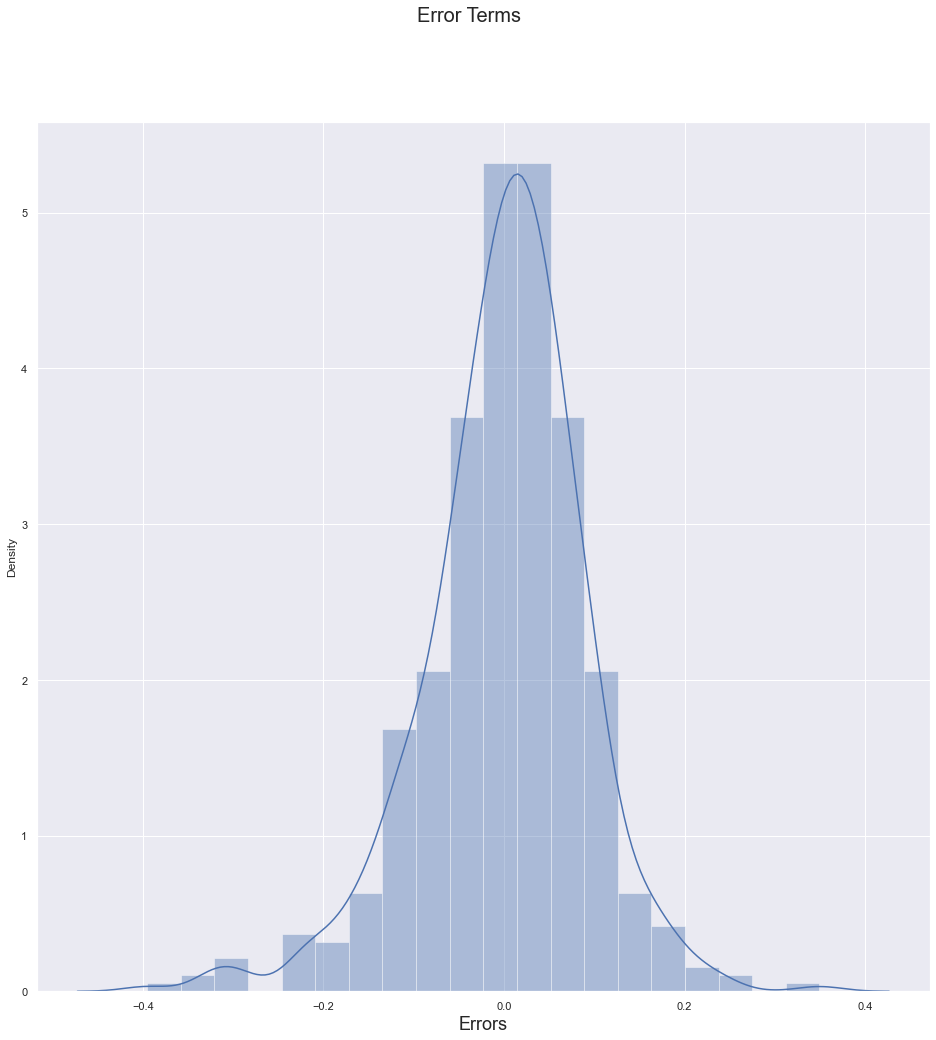

In [1268]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model 2

In [1269]:
y_train_count_3 = lm_o2.predict(X_train_og_2)


Text(0.5, 0, 'Errors')

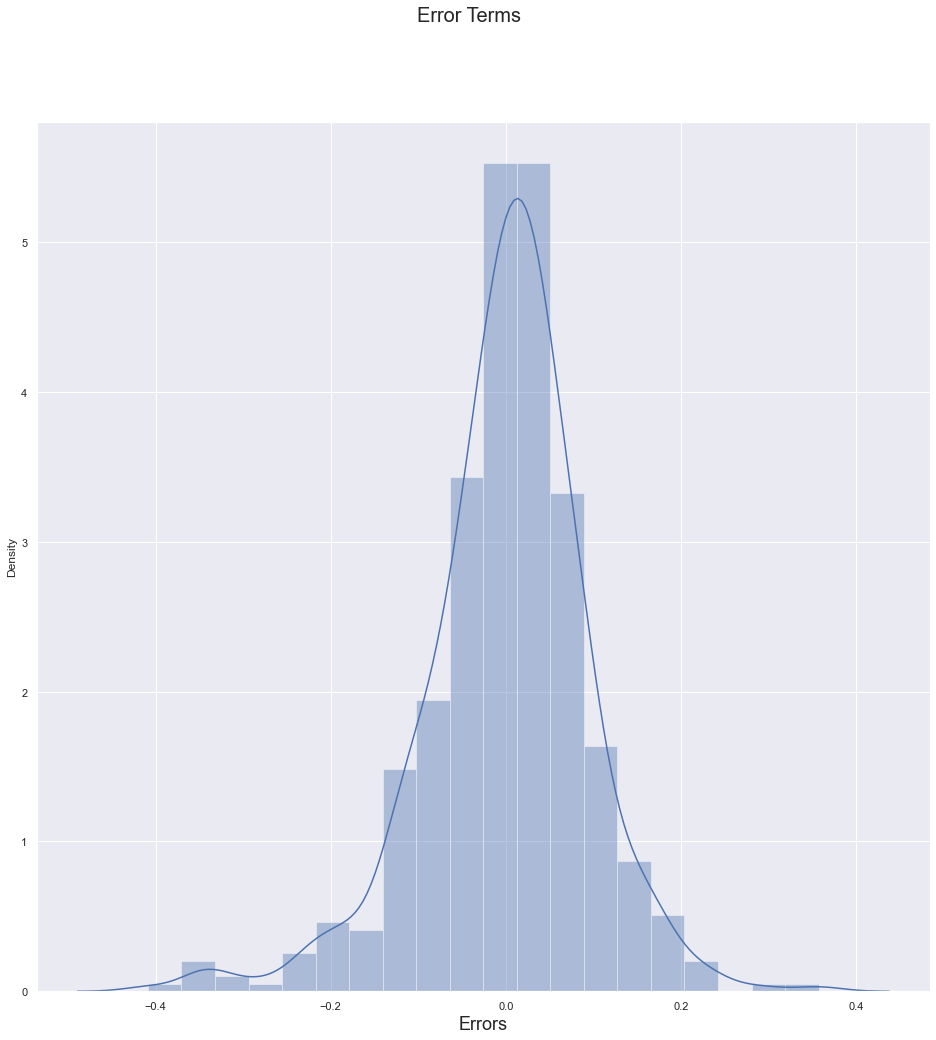

In [1270]:
y_train_count_3 = lm_o2.predict(X_train_og_2)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count_3), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

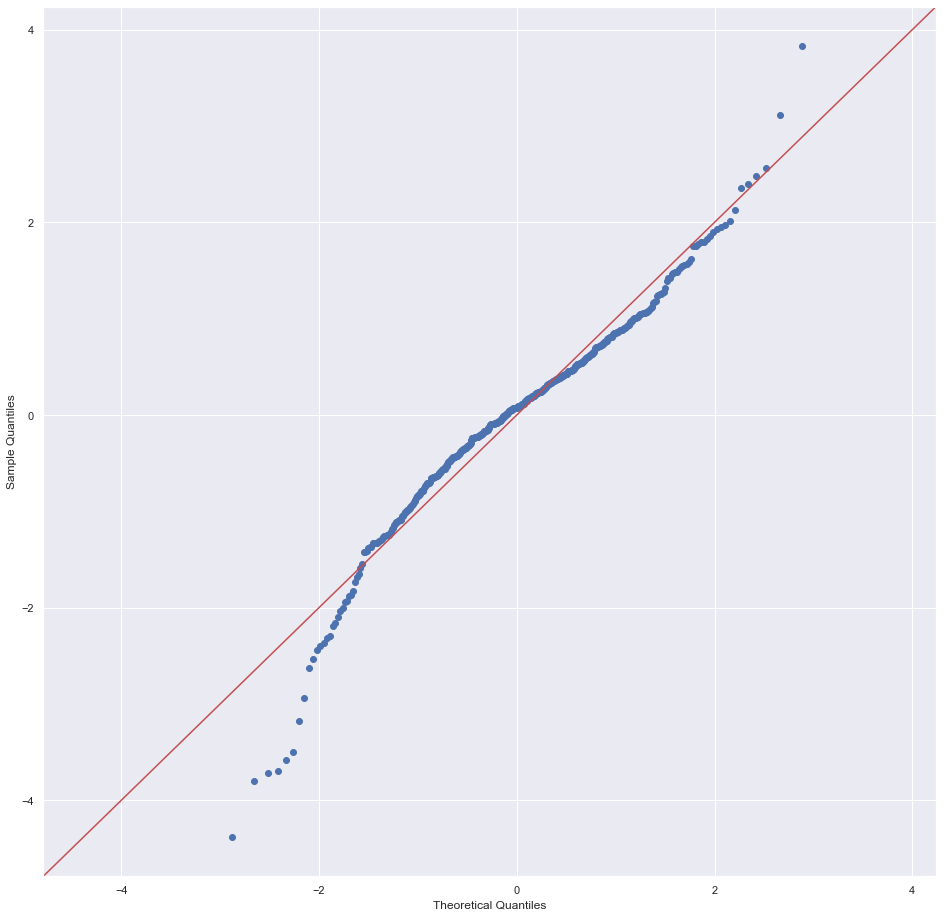

In [1271]:
sm.qqplot((y_train - y_train_count_3), fit=True, line='45')
plt.show()

### Model 3

In [1272]:
y_train_count_2 = lm_m3.predict(X_train_mix_3)

Text(0.5, 0, 'Errors')

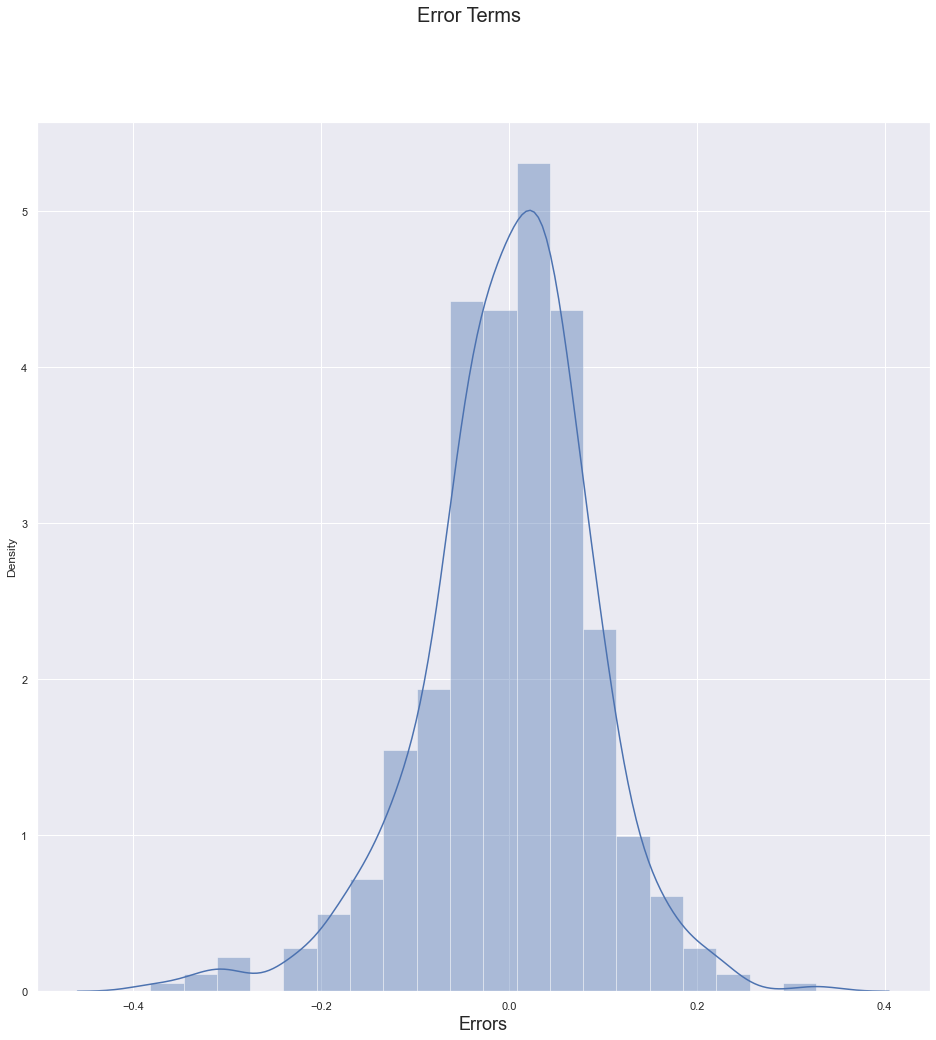

In [1273]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

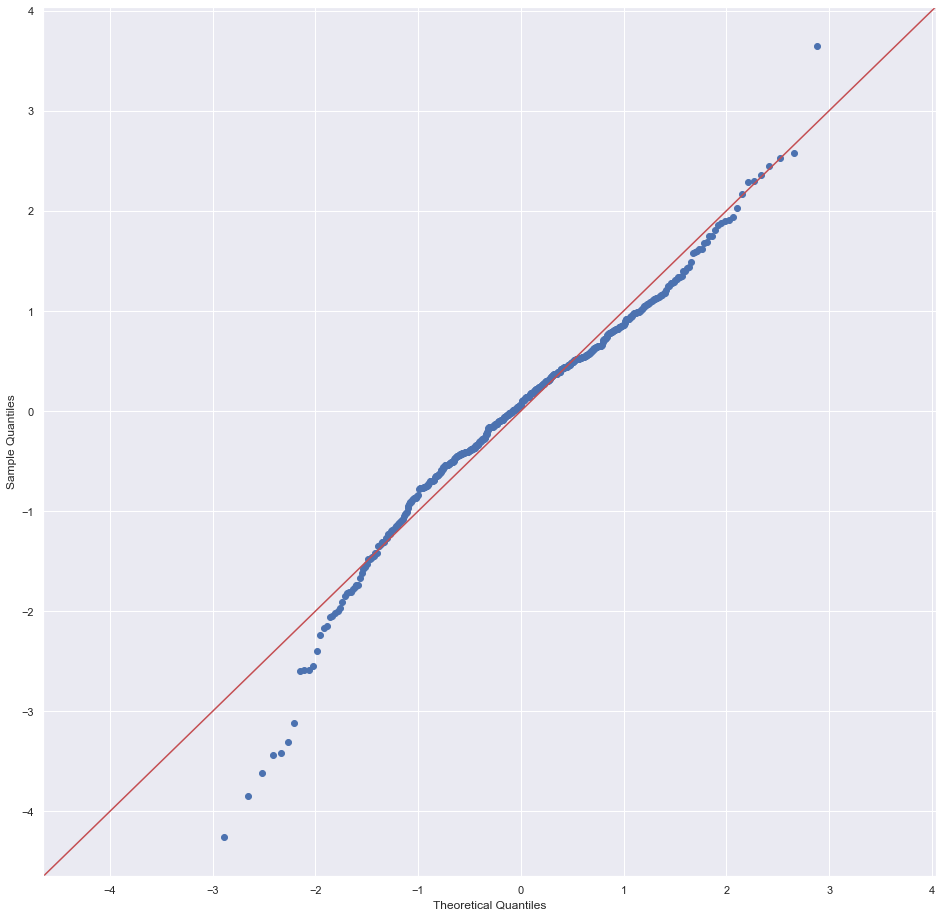

In [1274]:
sm.qqplot((y_train - y_train_count_2), fit=True, line='45')
plt.show()

### Model 1

In [1275]:
y_train_count_4 = lm_t10.predict(X_train_top10)

Text(0.5, 0, 'Errors')

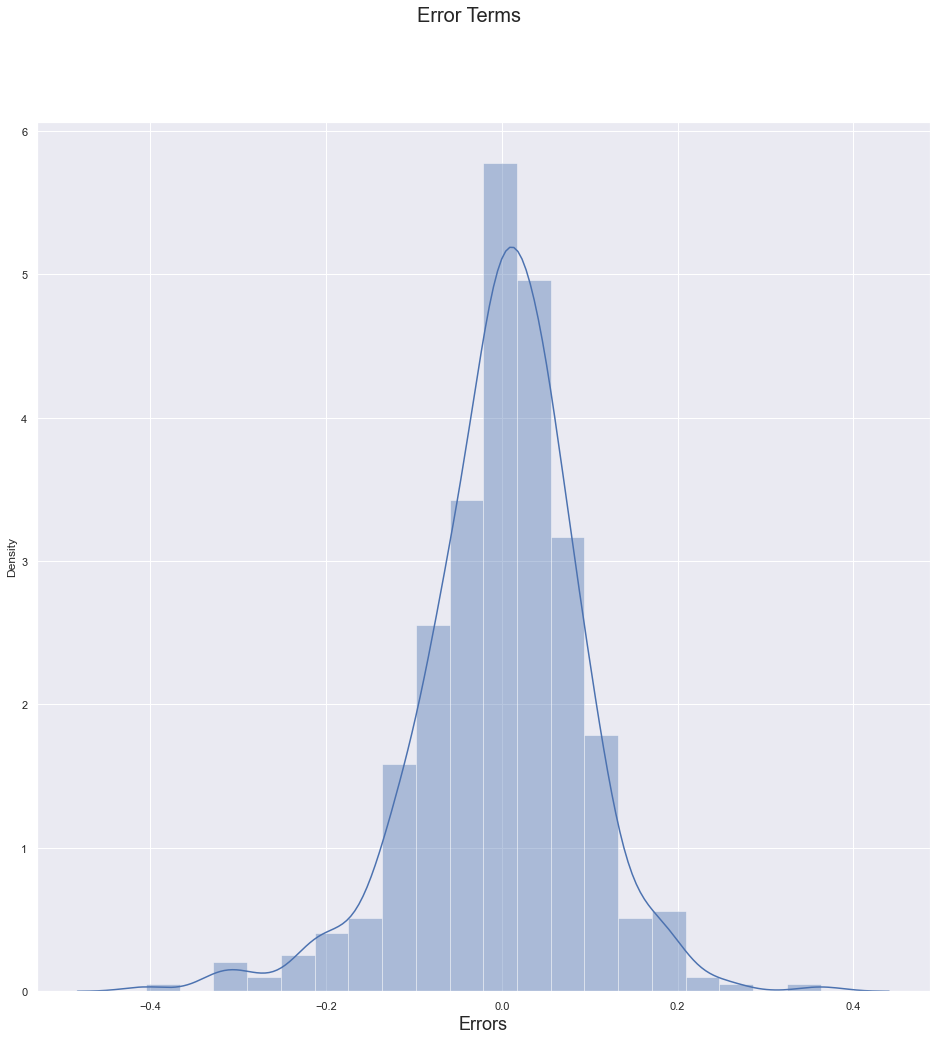

In [1276]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count_4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

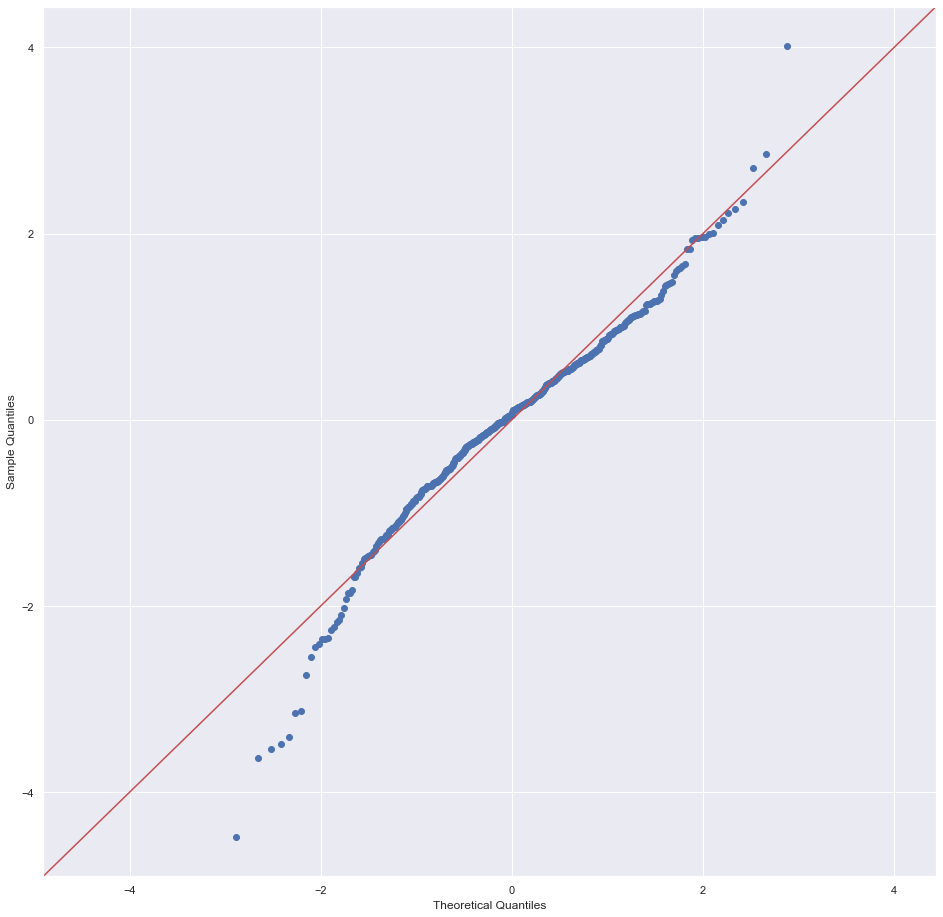

In [1277]:
sm.qqplot((y_train - y_train_count_4), fit=True, line='45')
plt.show()

## Making Predictions

- Model 4 and 2 have the most normally distributed errors and a high r squared values and hence we take them for comparision.

In [1278]:
num_vars = ['hum_temp', 'hum_wind', 'wind_temp', 'hum_temp_wind', 'temp', 'atemp', 'hum', 'windspeed', 'temp', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) # Scalling the test set

In [1279]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.318182,0.027273,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.531162,0.350956,0.342777,0.266532,0.272727,0.250,0.245455
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.466833,0.163248,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.229363,0.158938,0.199552,0.153548,0.446377,0.434,0.431338
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070742,0.047061,0.000234,0.036046,0.000000,0.000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327962,0.248076,0.190934,0.145764,0.000000,0.000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.532503,0.317802,0.311210,0.249912,0.000000,0.000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715580,0.415819,0.490120,0.329240,1.000000,0.250,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994648,0.958433,0.867386,0.895765,1.000000,1.000,1.000000


In [1280]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,rain,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,hum_temp,hum_wind,wind_temp,hum_temp_wind,q2,q3,q4
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.778293,0.159671,0.199957,0.173970,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.777876,0.207007,0.321667,0.242874,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.641487,0.493862,0.337532,0.348029,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.545993,0.260941,0.584555,0.299958,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.366142,0.273857,0.810666,0.293591,1,0,0


In [1281]:
# Dividing X and y
y_test = df_test.pop('cnt')
X_test = df_test

### Model 4 prediction and evaluation

In [1282]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [1283]:
pred_4 = X_train_mix_9.columns.tolist()

pred_4

['const',
 'yr',
 'holiday',
 'temp',
 'mist',
 'rain',
 'spring',
 'winter',
 'jul',
 'sep',
 'hum_wind',
 'summer']

In [1284]:
# Creating X_test_m4 dataframe by selecting variables from X_train_mix_9
X_test_m4 = X_test_m4[pred_4]
#X_test_m4 = X_test_m4.drop([~pred_4], axis = 1)
X_test_m4.head()

,const,yr,holiday,temp,mist,rain,spring,winter,jul,sep,hum_wind,summer
184,1.0,0,1,0.831783,1,0,0,0,1,0,0.159671,0
535,1.0,1,0,0.901354,0,0,0,0,0,0,0.207007,1
299,1.0,0,0,0.511964,1,0,0,1,0,0,0.493862,0
221,1.0,0,0,0.881625,0,0,0,0,0,0,0.260941,0
152,1.0,0,0,0.817246,0,0,0,0,0,0,0.273857,1


In [1285]:
X_test_m4.shape

(220, 12)

In [1286]:
# Making predictions using the fourth model

y_pred_m4 = lm_m9.predict(X_test_m4)

## Model Evaluation

- Evaluating the model through plot


Text(0, 0.5, 'y_pred_m4')

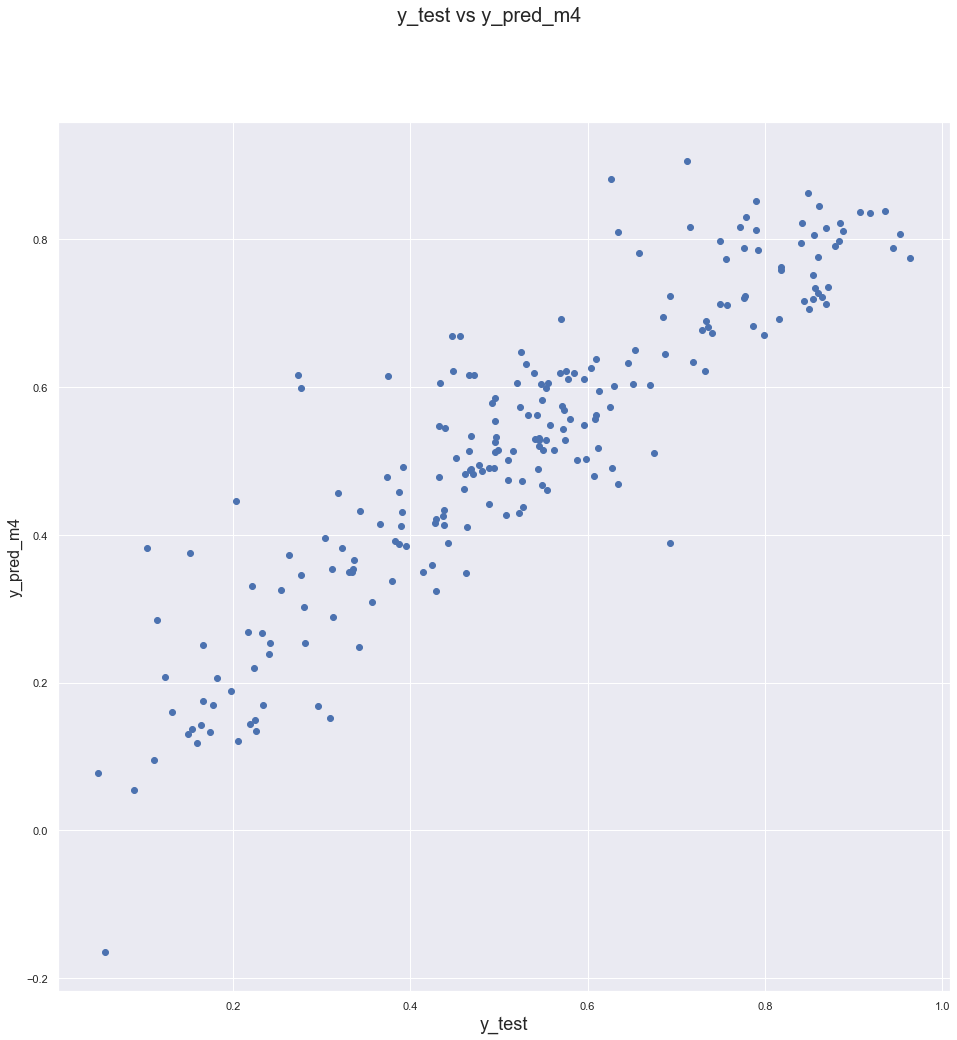

In [1287]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m4', fontsize = 16)   

In [1288]:
r2_score(y_test, y_pred_m4)  # R_squared score for the predicted model

0.8112728935106406

### Model 2 prediction and evaluation

In [1289]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [1290]:
pred_2 = X_train_og_2.columns.tolist()

X_test_m2 = X_test_m2[pred_2]

In [1291]:
# Creating X_test_m2 dataframe by selecting variables from X_train_og_2
X_test_m2 = X_test_m2[pred_2]

X_test_m2.head()

,const,yr,holiday,temp,hum,windspeed,mist,rain,spring,summer,winter
184,1.0,0,1,0.831783,0.657364,0.084219,1,0,0,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,0,1,0
299,1.0,0,0,0.511964,0.837699,0.334206,1,0,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,0,1,0


In [1292]:
# Making predictions using the fourth model
y_pred_m2 = lm_o2.predict(X_test_m2)

## Model Evaluation

- Evaluating the model through plot


Text(0, 0.5, 'y_pred_m2')

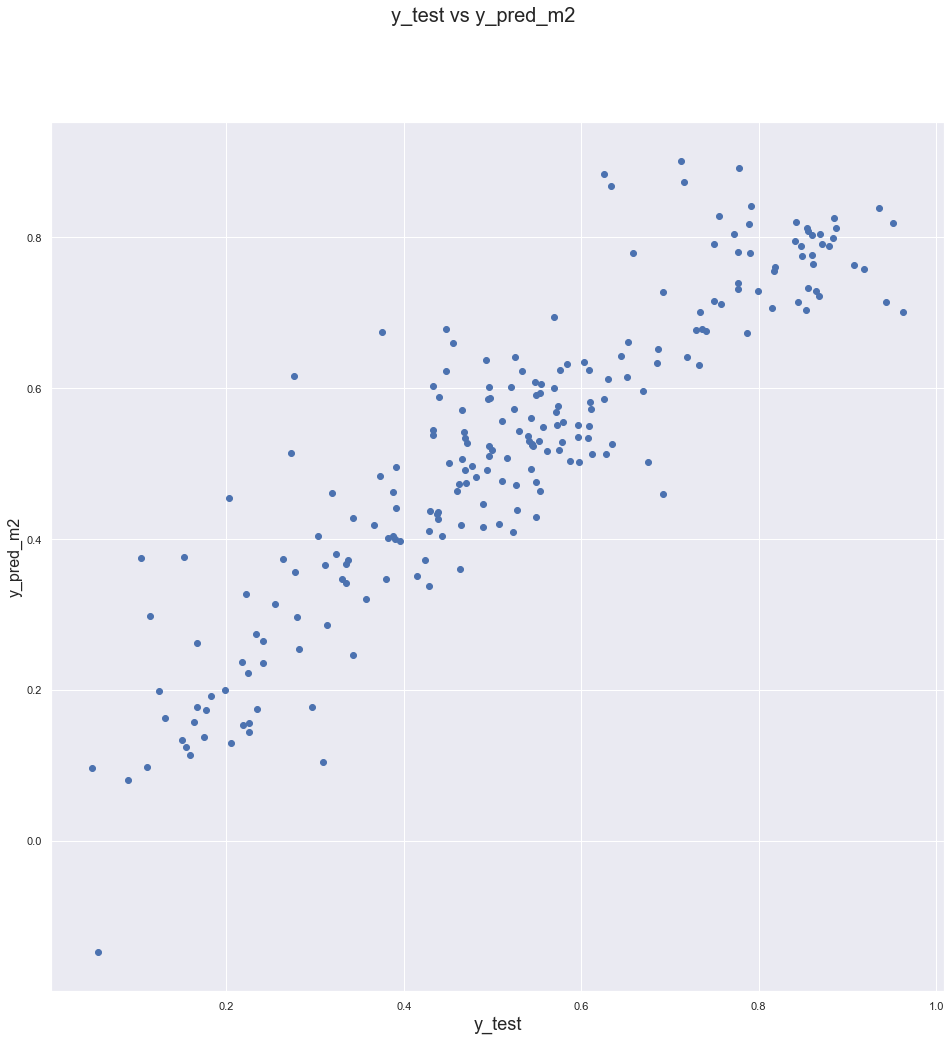

In [1293]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred_m2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m2', fontsize = 16)   

In [1294]:
r2_score(y_test, y_pred_m2) # R_squared score for the predicted model

0.8068409066288984

#### Predicting performance of other models



In [1295]:
# Model 3 just to see the r squared performance
X_test_m3 = sm.add_constant(X_test)

pred_3 = X_train_mix_3.columns.tolist()

X_test_m3 = X_test_m3[pred_3]

y_pred_m3 = lm_m3.predict(X_test_m3)

r2_score(y_test, y_pred_m3)  # R_squared score for the predicted model

0.8050021066128354

Model 3 is not as optimum as model 2

In [1296]:
# Model 1 just to see the r squared performance
X_test_m1 = sm.add_constant(X_test)

pred_1 = X_train_top10.columns.tolist()

X_test_m1 = X_test_m1[pred_1]

y_pred_m1 = lm_t10.predict(X_test_m1)

r2_score(y_test, y_pred_m1) # R_squared score for the predicted model

0.8139171588000608

Model 1 is not as optimum as model 2

### Comparing the R_squared values of the trained and predicted models

In [1297]:
data = {'Models': [1, 2, 3, 4], 'R_sqr_train': [83.8, 82.7, 84.0, 84.1], 'R_sqr_pred': [81.39, 80.68, 80.50, 81.12]}
R_sqr = pd.DataFrame.from_dict(data)
R_sqr['Difference'] = R_sqr['R_sqr_train'] - R_sqr['R_sqr_pred']
R_sqr.set_index('Models')
R_sqr

,Models,R_sqr_train,R_sqr_pred,Difference
0,1,83.8,81.39,2.41
1,2,82.7,80.68,2.02
2,3,84.0,80.50,3.50
3,4,84.1,81.12,2.98


- **Model 2** has a high R_squared value and the least difference between the R_squared values between other trained and predicted models
- **Model 2** can be hence selected for predicting the future datasets

# The equation of our model  can be given as

$ cnt = 0.2932 + 0.2307  \times  yr - 0.0860  \times  holiday + 0.4960 \times temp - 0.1406 \times hum - 0.1830 \times windspeed - 0.0522 \times mist - 0.2396 \times rain - 0.0749 \times spring + 0.0432 \times summer + 0.0871 \times winter $

Further improvisations can be made on this dataset using non linear models

## Checking for Assumptions of linear regression

 -	Linearity
 -	Homoscedasticity
 -  Mean of the Residuals
 -	Independence
 -	Normality

- Linearity can be explained from the EDA analysis of the pair plot itself. Significant variables like temp are colinear to the dependent variable.


#### Homoscedasticity

In [1298]:
y_train_count_3 = lm_o2.predict(X_train_og_2)


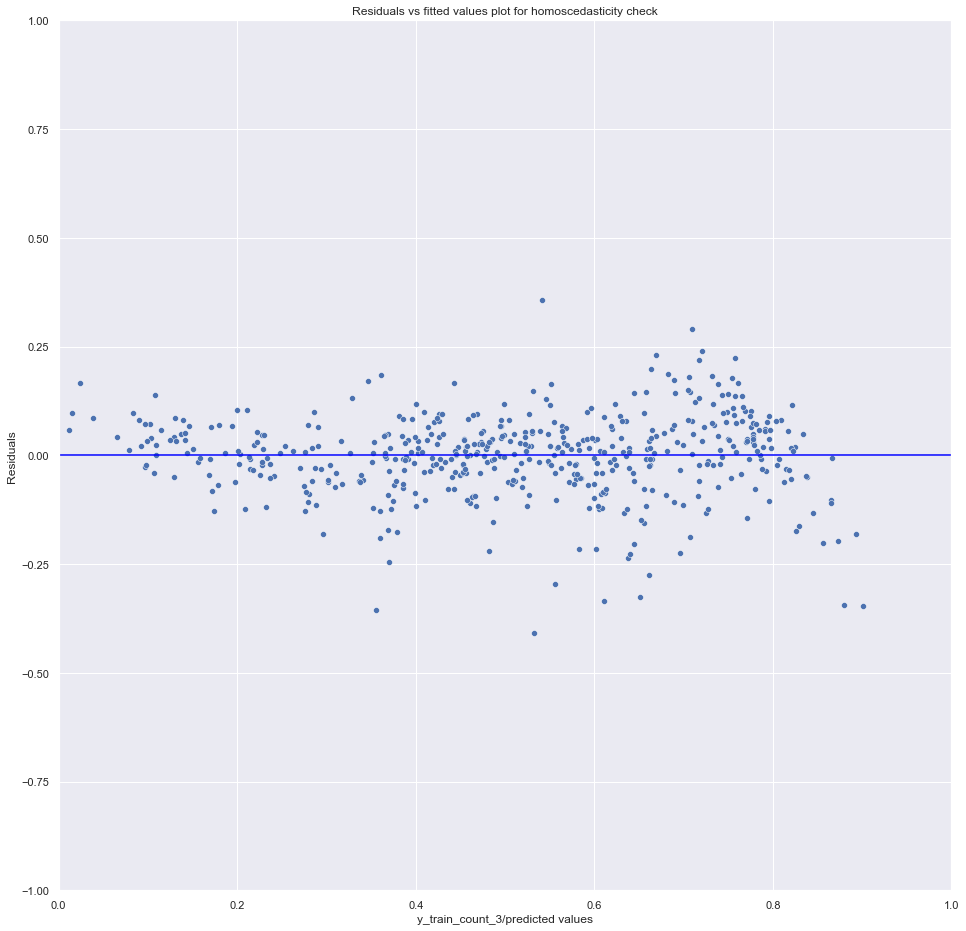

In [1299]:
p = sns.scatterplot(y_train_count_3,residuals)
plt.xlabel('y_train_count_3/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

The shape of distribution is random and does not show heteroscedasticity patterns like linear, quadratic or funnel shaped distribution, hence the data is Homoscedastic.

#### Mean of Residuals

In [1300]:
residuals = y_train.values-y_train_count_3
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.054745998637747e-15


- The mean of the residuals here is close to zero, so we can say that this is a good regression model

#### Multicoliniarity

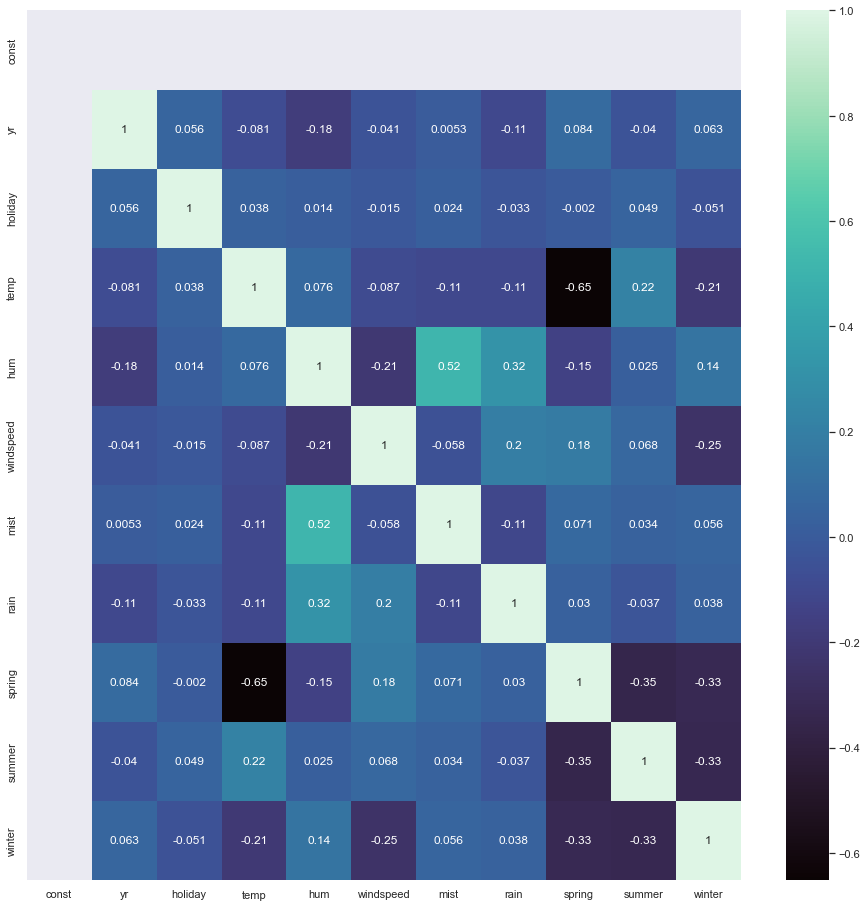

In [1301]:
mulcorr = X_test_m2.corr()
sns.heatmap(mulcorr, cmap="mako", annot=True)
sns.set(rc={'figure.figsize':(16,16)})

- The corelation values of the features is close to zero or very low, hence multicollinearity is very low or non existant

#### Autocorrelation 



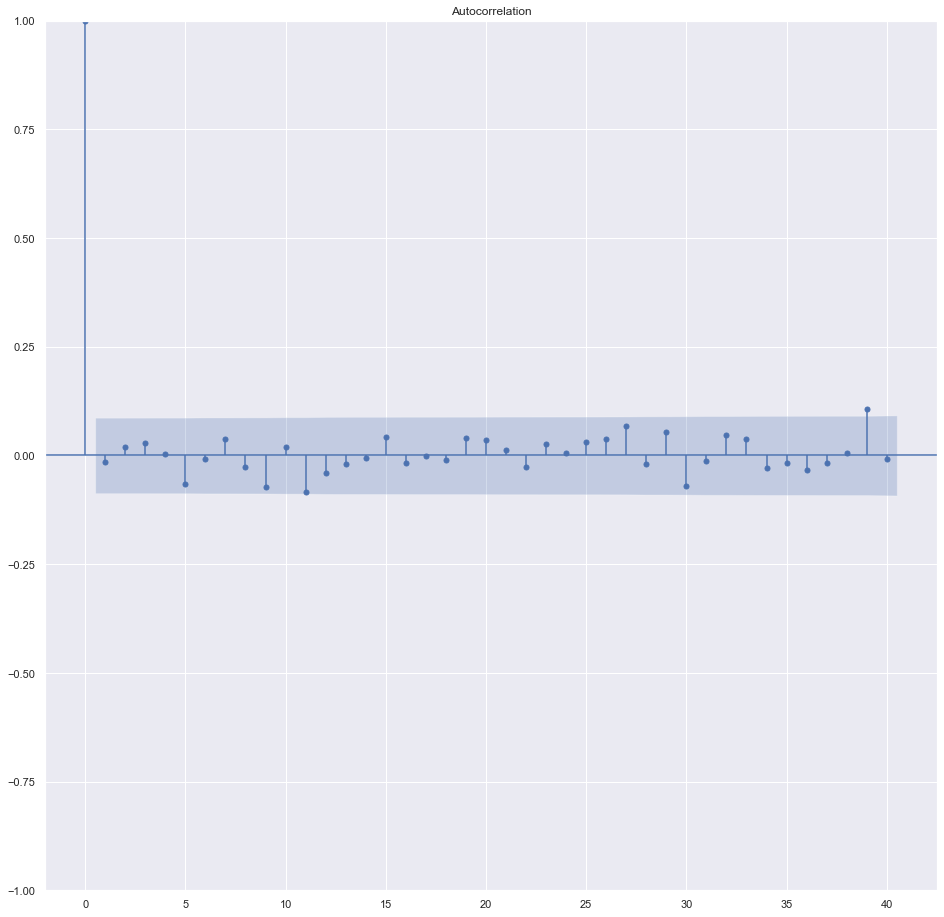

In [1302]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

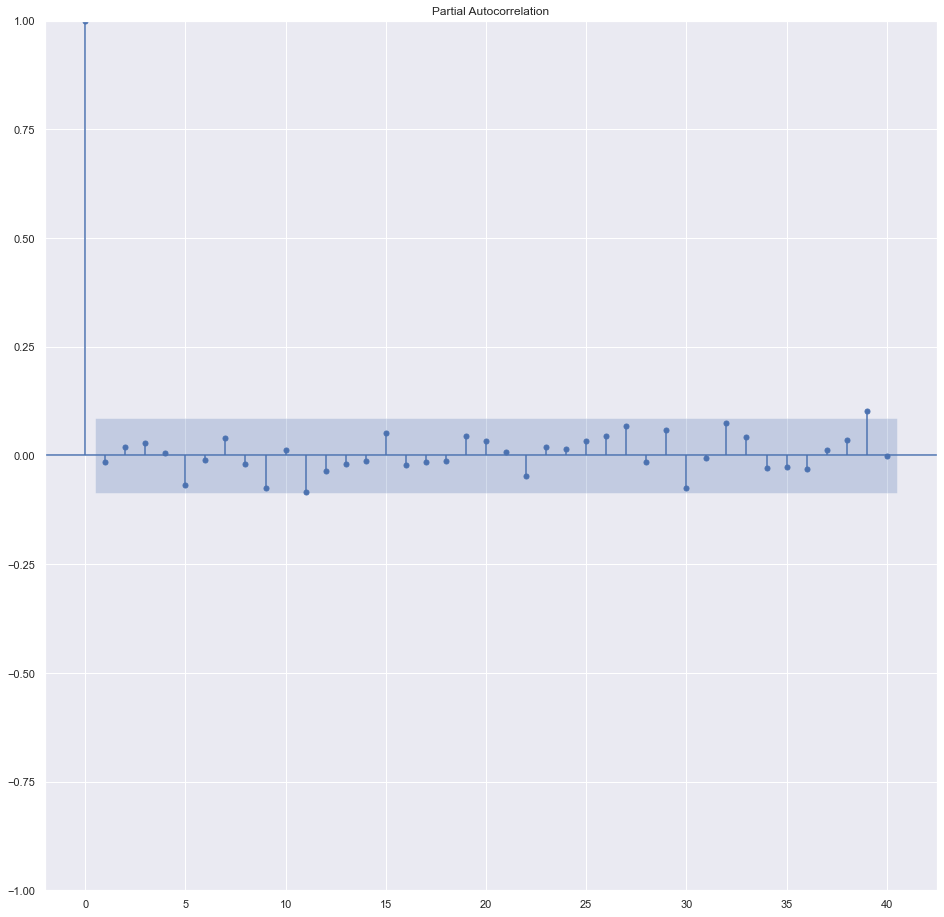

In [1303]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

- Not much auto corelation is observed as all the values are present under the confidence interval region


#### Normality of Errors

Text(0.5, 0, 'Residuals')

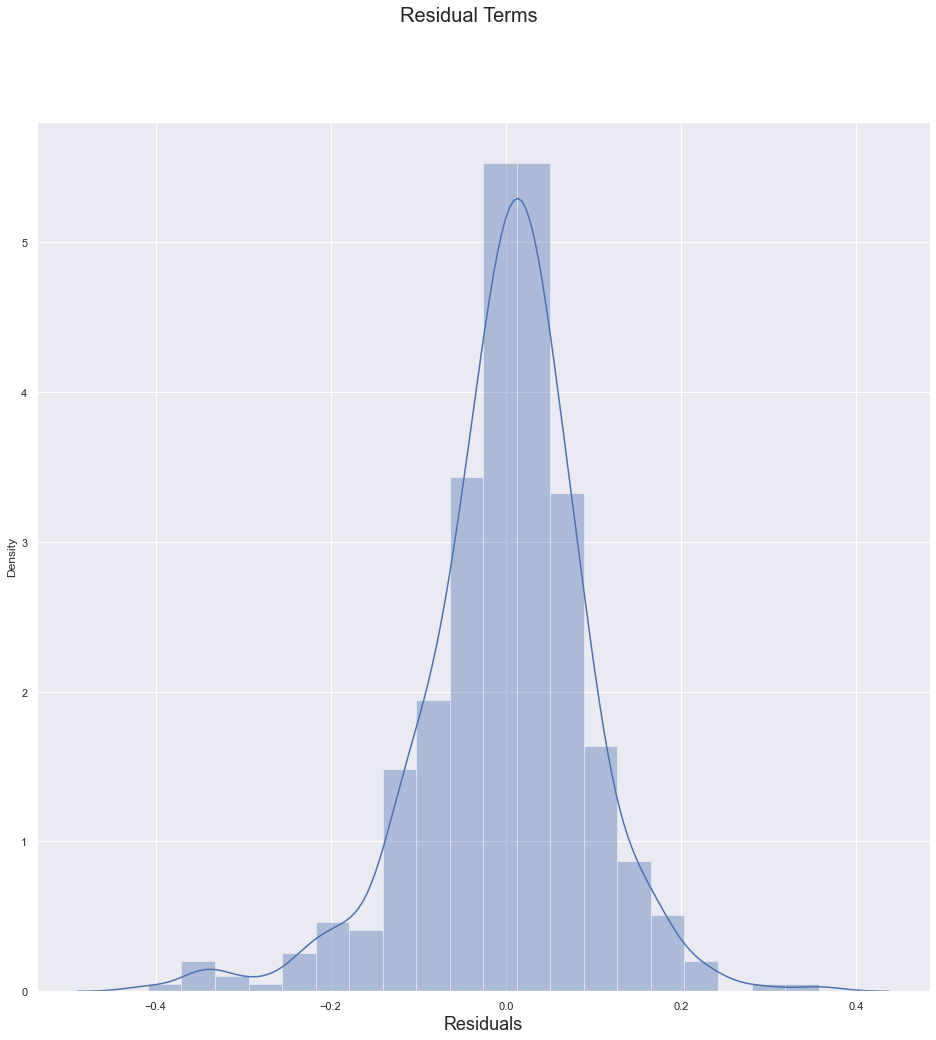

In [1304]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count_3), bins = 20)
fig.suptitle('Residual Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label

- The Distribution curve of the error terms apperars to be normally distributed